# **Customer Churn Analysis**

### Table of Contents

* [Importing Required Libraries](#head1)
* [Loading Data](#head2)
* [Inittial Data Analysis](#head3)
    * [Display first 5 rows of data](#subhead1)
    * [Information related to dataset](#subhead2)
    * [Converting Total Charges into numeric data type](#subhead3)
    * [Checking Null Values](#subhead4)
    * [Unique Value of each feature in the dataset](#subhead5)
    * [Dropping Unnecessary Columns](#subhead6)
    * [Convert Zip Code, Tenure Months and Churn Value into int64](#subhead7)
    * [Categorical Features & Numeric Features](#subhead8)
    * [Statistical Description of numeric Features](#subhead9)
    * [Handling Null Values](#subhead10)
    

## **Importing Required Libraries** <a class="anchor" id="head1"></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## **Loading Data** <a class="anchor" id="head2"></a>

In [2]:
telecom_customer = pd.read_csv("https://raw.githubusercontent.com/TeamEpicProjects/Customer-Churn-Prediction/main/data/1/TelcoCustomerChurn.csv")

## **Initial Data Analysis** <a class="anchor" id="head3"></a>

**Display first 5 rows of data** <a class="anchor" id="subhead1"></a>

In [3]:
telecom_customer.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,CLTV,Churn Reason,Churn Value
0,5196-WPYOW,1.0,United States,California,Paso Robles,93446.0,"35.634222, -120.728341",35.634222,-120.728341,Male,No,Yes,Yes,67.0,Yes,No,DSL,Yes,Yes,No,Yes,No,No,One year,No,Mailed check,60.05,3994.05,6148.0,NaN,0.0
1,8189-HBVRW,1.0,United States,California,Los Angeles,90005.0,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,No,53.0,Yes,Yes,Fiber optic,Yes,Yes,Yes,NaN,No,No,Month-to-month,No,Electronic check,90.80,4921.2,5249.0,NaN,0.0
2,4091-TVOCN,1.0,United States,California,Potrero,91963.0,"32.619465, -116.593605",32.619465,-116.593605,Male,No,No,No,48.0,Yes,Yes,DSL,Yes,No,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),78.75,3682.45,2257.0,NaN,0.0
3,9603-OAIHC,1.0,United States,California,Palmdale,93551.0,"34.613476, -118.256358",34.613476,-118.256358,Male,Yes,No,No,1.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.05,70.05,2469.0,NaN,0.0
4,8647-SDTWQ,1.0,United States,California,Hood,95639.0,"38.375325, -121.507935",38.375325,-121.507935,Male,No,Yes,Yes,57.0,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,74.30,4018.35,4133.0,NaN,0.0


**Information related to dataset** <a class="anchor" id="subhead2"></a>

In [4]:
telecom_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4718 entries, 0 to 4717
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         4687 non-null   object 
 1   Count              4691 non-null   float64
 2   Country            4708 non-null   object 
 3   State              4715 non-null   object 
 4   City               4688 non-null   object 
 5   Zip Code           4698 non-null   float64
 6   Lat Long           4713 non-null   object 
 7   Latitude           4695 non-null   float64
 8   Longitude          4685 non-null   float64
 9   Gender             4698 non-null   object 
 10  Senior Citizen     4711 non-null   object 
 11  Partner            4678 non-null   object 
 12  Dependents         4672 non-null   object 
 13  Tenure Months      4704 non-null   float64
 14  Phone Service      4692 non-null   object 
 15  Multiple Lines     4696 non-null   object 
 16  Internet Service   4692 

* Total Charges should be in float64 instead of object
* All features contains null values

**Converting Total Charges into numeric data type** <a class="anchor" id="subhead3"></a>

In [5]:
telecom_customer['Total Charges'] = pd.to_numeric(telecom_customer['Total Charges'],errors="coerce")

**Checking Null Values** <a class="anchor" id="subhead4"></a>

In [6]:
telecom_customer.isnull().sum()

CustomerID             31
Count                  27
Country                10
State                   3
City                   30
Zip Code               20
Lat Long                5
Latitude               23
Longitude              33
Gender                 20
Senior Citizen          7
Partner                40
Dependents             46
Tenure Months          14
Phone Service          26
Multiple Lines         22
Internet Service       26
Online Security        44
Online Backup           4
Device Protection       7
Tech Support           23
Streaming TV           32
Streaming Movies       30
Contract               46
Paperless Billing      24
Payment Method          1
Monthly Charges         4
Total Charges          23
CLTV                   26
Churn Reason         3457
Churn Value            25
dtype: int64

**Unique Value of each feature in the dataset** <a class="anchor" id="subhead5"></a>

In [7]:
telecom_customer.nunique()


CustomerID           4687
Count                   1
Country                 1
State                   1
City                 1117
Zip Code             1633
Lat Long             1633
Latitude             1632
Longitude            1632
Gender                  2
Senior Citizen          2
Partner                 2
Dependents              2
Tenure Months          73
Phone Service           2
Multiple Lines          3
Internet Service        3
Online Security         3
Online Backup           3
Device Protection       3
Tech Support            3
Streaming TV            3
Streaming Movies        3
Contract                3
Paperless Billing       2
Payment Method          4
Monthly Charges      1421
Total Charges        4462
CLTV                 2807
Churn Reason           20
Churn Value             2
dtype: int64

* Count, Country and State have only 1 unique value, no relevant contribution in our analysis so drop it.
* CustomerID is also not required for our analysis so we have to drop it.
* Latitude & Longitude is not required as we already have Lat Long,so drop them.

**Dropping Unnecessary Columns** <a class="anchor" id="subhead6"></a>

In [8]:
telecom_customer.drop(['CustomerID','Count','Country','State','Lat Long'],axis=1,inplace=True)
telecom_customer

,City,Zip Code,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,CLTV,Churn Reason,Churn Value
0,Paso Robles,93446.0,35.634222,-120.728341,Male,No,Yes,Yes,67.0,Yes,No,DSL,Yes,Yes,No,Yes,No,No,One year,No,Mailed check,60.05,3994.05,6148.0,NaN,0.0
1,Los Angeles,90005.0,34.059281,-118.307420,Female,No,No,No,53.0,Yes,Yes,Fiber optic,Yes,Yes,Yes,NaN,No,No,Month-to-month,No,Electronic check,90.80,4921.20,5249.0,NaN,0.0
2,Potrero,91963.0,32.619465,-116.593605,Male,No,No,No,48.0,Yes,Yes,DSL,Yes,No,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),78.75,3682.45,2257.0,NaN,0.0
3,Palmdale,93551.0,34.613476,-118.256358,Male,Yes,No,No,1.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.05,70.05,2469.0,NaN,0.0
4,Hood,95639.0,38.375325,-121.507935,Male,No,Yes,Yes,57.0,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,74.30,4018.35,4133.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4713,Orange,92866.0,33.784597,-117.844535,Female,No,No,No,15.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),20.10,302.45,4359.0,NaN,0.0
4714,San Francisco,94107.0,37.768881,-122.395521,Female,No,Yes,Yes,71.0,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,No,Two year,Yes,Credit card (automatic),99.00,7061.65,4305.0,NaN,0.0
4715,San Dimas,91773.0,34.102119,-117.815532,Male,No,Yes,No,3.0,No,No phone service,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,35.15,99.75,2987.0,Attitude of support person,1.0
4716,Klamath River,96050.0,41.816595,-122.948287,Female,No,Yes,No,17.0,Yes,No,Fiber optic,No,No,Yes,Yes,Yes,Yes,One year,No,Bank transfer (automatic),98.60,1704.95,5160.0,Moved,1.0


* Zip Code, Tenure Months and Churn Value are having integer values but their type is float64

**Convert Zip Code, Tenure Months and Churn Value into int64** <a class="anchor" id="subhead7"></a>

In [9]:
telecom_customer[['Zip Code','Tenure Months','Churn Value']] = telecom_customer[['Zip Code','Tenure Months','Churn Value']].astype('Int64')
telecom_customer

,City,Zip Code,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,CLTV,Churn Reason,Churn Value
0,Paso Robles,93446,35.634222,-120.728341,Male,No,Yes,Yes,67,Yes,No,DSL,Yes,Yes,No,Yes,No,No,One year,No,Mailed check,60.05,3994.05,6148.0,NaN,0
1,Los Angeles,90005,34.059281,-118.307420,Female,No,No,No,53,Yes,Yes,Fiber optic,Yes,Yes,Yes,NaN,No,No,Month-to-month,No,Electronic check,90.80,4921.20,5249.0,NaN,0
2,Potrero,91963,32.619465,-116.593605,Male,No,No,No,48,Yes,Yes,DSL,Yes,No,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),78.75,3682.45,2257.0,NaN,0
3,Palmdale,93551,34.613476,-118.256358,Male,Yes,No,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.05,70.05,2469.0,NaN,0
4,Hood,95639,38.375325,-121.507935,Male,No,Yes,Yes,57,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,74.30,4018.35,4133.0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4713,Orange,92866,33.784597,-117.844535,Female,No,No,No,15,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),20.10,302.45,4359.0,NaN,0
4714,San Francisco,94107,37.768881,-122.395521,Female,No,Yes,Yes,71,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,No,Two year,Yes,Credit card (automatic),99.00,7061.65,4305.0,NaN,0
4715,San Dimas,91773,34.102119,-117.815532,Male,No,Yes,No,3,No,No phone service,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,35.15,99.75,2987.0,Attitude of support person,1
4716,Klamath River,96050,41.816595,-122.948287,Female,No,Yes,No,17,Yes,No,Fiber optic,No,No,Yes,Yes,Yes,Yes,One year,No,Bank transfer (automatic),98.60,1704.95,5160.0,Moved,1


**Categorical Features & Numeric Features** <a class="anchor" id="subhead8"></a>

In [10]:
cat_features = telecom_customer.select_dtypes(include=['object'])
cat_features.columns

Index(['City', 'Gender', 'Senior Citizen', 'Partner', 'Dependents',
       'Phone Service', 'Multiple Lines', 'Internet Service',
       'Online Security', 'Online Backup', 'Device Protection', 'Tech Support',
       'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing',
       'Payment Method', 'Churn Reason'],
      dtype='object')

In [11]:
num_features= telecom_customer.select_dtypes(include=['float64','int64'])
num_features.columns

Index(['Zip Code', 'Latitude', 'Longitude', 'Tenure Months', 'Monthly Charges',
       'Total Charges', 'CLTV', 'Churn Value'],
      dtype='object')

**Statistical Description of numeric Features** <a class="anchor" id="subhead9"></a>

* Churn Value will not include in statistical measures as it represents only 2 values.

In [12]:
num_stats_features=num_features.drop(['Churn Value'],axis=1)
num_stats_features.head()

,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Total Charges,CLTV
0,93446,35.634222,-120.728341,67,60.05,3994.05,6148.0
1,90005,34.059281,-118.307420,53,90.80,4921.20,5249.0
2,91963,32.619465,-116.593605,48,78.75,3682.45,2257.0
3,93551,34.613476,-118.256358,1,70.05,70.05,2469.0
4,95639,38.375325,-121.507935,57,74.30,4018.35,4133.0


In [13]:
round(num_stats_features.describe(),2)

,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Total Charges,CLTV
count,4698.00,4695.00,4685.00,4704.00,4714.00,4695.00,4692.00
mean,93523.33,36.28,-119.79,32.73,64.89,2311.05,4406.63
std,1850.95,2.45,2.16,24.61,30.14,2281.13,1187.67
min,90001.00,32.56,-124.30,0.00,18.25,18.85,2003.00
25%,92102.25,34.03,-121.81,9.00,35.46,412.33,3477.50
50%,93550.00,36.39,-119.73,30.00,70.38,1424.60,4533.00
75%,95345.00,38.20,-118.03,56.00,89.95,3877.08,5402.25
max,96161.00,41.96,-114.19,72.00,118.75,8684.80,6499.00


* Mean Value of monthly charges is 64.88 but 25% customers pay more than 89.95

**Handling Null Values** <a class="anchor" id="subhead10"></a>

In [14]:
telecom_customer['Tenure Months'] = telecom_customer['Tenure Months'].fillna( telecom_customer['Tenure Months'].mode())
telecom_customer['Monthly Charges'] = telecom_customer['Monthly Charges'].fillna( telecom_customer['Monthly Charges'].mode())
telecom_customer['Total Charges'] = telecom_customer['Total Charges'].fillna( telecom_customer['Total Charges'].mode())
telecom_customer['CLTV'] = telecom_customer['CLTV'].fillna( telecom_customer['CLTV'].mode())

In [15]:
telecom_customer['Phone Service'].fillna("Yes")

0       Yes
1       Yes
2       Yes
3       Yes
4       Yes
       ... 
4713    Yes
4714    Yes
4715     No
4716    Yes
4717    Yes
Name: Phone Service, Length: 4718, dtype: object

In [16]:
telecom_customer['Multiple Lines'].value_counts()

No                  2231
Yes                 2004
No phone service     461
Name: Multiple Lines, dtype: int64

Since both seem to have similar range of values so can't fill

In [17]:
telecom_customer['Internet Service'].value_counts()

Fiber optic    2053
DSL            1618
No             1021
Name: Internet Service, dtype: int64

In [18]:
telecom_customer['Internet Service'].fillna("Fiber optic")

0               DSL
1       Fiber optic
2               DSL
3       Fiber optic
4       Fiber optic
           ...     
4713             No
4714    Fiber optic
4715            DSL
4716    Fiber optic
4717            DSL
Name: Internet Service, Length: 4718, dtype: object

In [19]:
telecom_customer['Device Protection'].value_counts()

No                     2044
Yes                    1643
No internet service    1024
Name: Device Protection, dtype: int64

In [20]:
telecom_customer['Device Protection'].fillna("No")

0                        No
1                       Yes
2                       Yes
3                        No
4                        No
               ...         
4713    No internet service
4714                    Yes
4715                     No
4716                    Yes
4717                    Yes
Name: Device Protection, Length: 4718, dtype: object

In [21]:
telecom_customer['Tech Support'].value_counts()


No                     2251
Yes                    1420
No internet service    1024
Name: Tech Support, dtype: int64

In [22]:
telecom_customer['Tech Support'].fillna("No")

0                       Yes
1                        No
2                        No
3                        No
4                        No
               ...         
4713    No internet service
4714                     No
4715                     No
4716                    Yes
4717                     No
Name: Tech Support, Length: 4718, dtype: object

In [23]:
telecom_customer['Streaming TV'].value_counts()
telecom_customer['Streaming Movies'].value_counts()


Yes                    1843
No                     1830
No internet service    1015
Name: Streaming Movies, dtype: int64

Since both seem to have similar range of values so can't fill

In [24]:
telecom_customer['Contract'].value_counts()

Month-to-month    2540
Two year          1144
One year           988
Name: Contract, dtype: int64

In [25]:
telecom_customer['Contract'].fillna("Month-to-month")

0             One year
1       Month-to-month
2             One year
3       Month-to-month
4       Month-to-month
             ...      
4713          One year
4714          Two year
4715    Month-to-month
4716          One year
4717          One year
Name: Contract, Length: 4718, dtype: object

In [26]:
telecom_customer['Paperless Billing'].value_counts()


Yes    2771
No     1923
Name: Paperless Billing, dtype: int64

In [27]:
telecom_customer['Paperless Billing'].fillna("Yes")

0        No
1        No
2       Yes
3       Yes
4       Yes
       ... 
4713     No
4714    Yes
4715    Yes
4716     No
4717     No
Name: Paperless Billing, Length: 4718, dtype: object

In [28]:
telecom_customer['Payment Method'].value_counts()


Electronic check             1579
Mailed check                 1091
Bank transfer (automatic)    1025
Credit card (automatic)      1022
Name: Payment Method, dtype: int64

In [29]:
telecom_customer['Payment Method'].fillna("Electronic check")

0                    Mailed check
1                Electronic check
2         Credit card (automatic)
3                Electronic check
4                Electronic check
                  ...            
4713      Credit card (automatic)
4714      Credit card (automatic)
4715             Electronic check
4716    Bank transfer (automatic)
4717      Credit card (automatic)
Name: Payment Method, Length: 4718, dtype: object

In [30]:
telecom_customer['Churn Value']=telecom_customer['Churn Value'].map({0:'No',1:'Yes'})

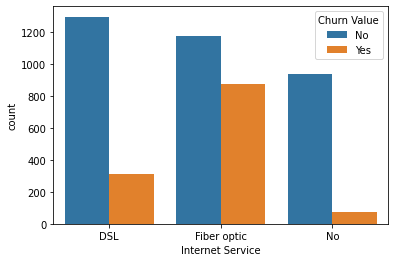

In [31]:
sns.countplot(data=telecom_customer,x='Internet Service', hue='Churn Value')


* Customer who opt for fiber optic are mostly churn
* Customers with DSL are most and they are less churn

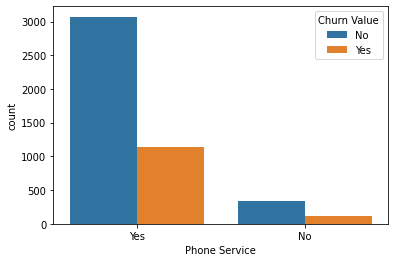

In [32]:
sns.countplot(data=telecom_customer,x='Phone Service', hue='Churn Value')


* Customer who opt for phone service are more churn

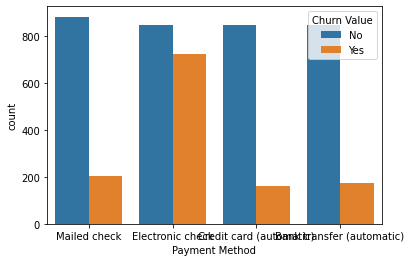

In [33]:
sns.countplot(data=telecom_customer,x='Payment Method' , hue='Churn Value')


* Customer who pays with Electronic Check are mostly churn

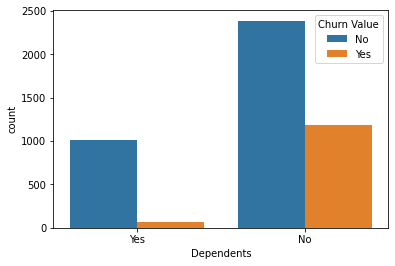

In [34]:
sns.countplot(data=telecom_customer,x='Dependents' , hue='Churn Value')


* Customer with dependents are mostly churn

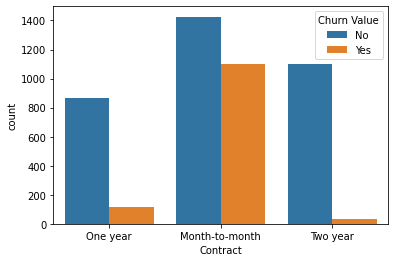

In [35]:
sns.countplot(data=telecom_customer,x='Contract' , hue='Churn Value')


* Customer prefer Month-to-Month contract but also they will mostly churn.

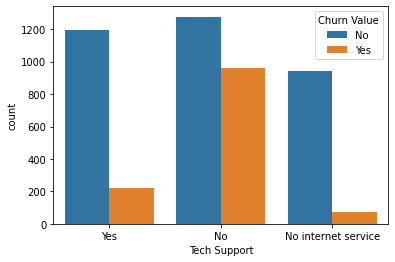

In [36]:
sns.countplot(data=telecom_customer,x='Tech Support', hue='Churn Value')


* Customer without Tech Support are mostly churn
* By giving Tech Support ,we can prevent churn as more customer also prefer tech support.

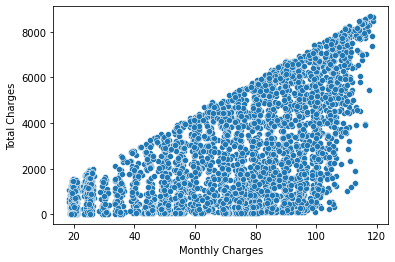

In [37]:
sns.scatterplot(data=telecom_customer,y='Total Charges',x='Monthly Charges')

* Total Charges Increases as Monthly Charges Increases

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

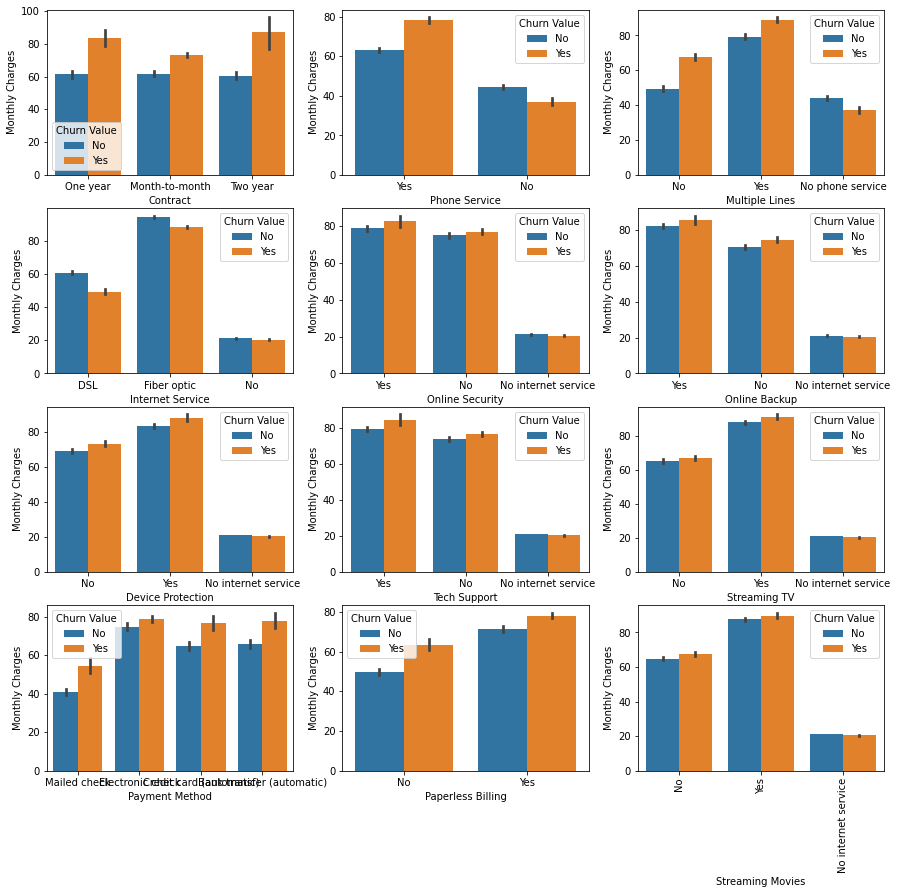

In [38]:
f,axes = plt.subplots(4,3,figsize=(15,14)) 
sns.barplot(x='Contract', y='Monthly Charges', data=telecom_customer, hue='Churn Value',ax = axes[0,0])
sns.barplot(x='Phone Service', y='Monthly Charges', data=telecom_customer, hue='Churn Value', ax = axes[0,1])
sns.barplot(x='Multiple Lines', y='Monthly Charges', data=telecom_customer, hue='Churn Value', ax = axes[0,2])
sns.barplot(x='Internet Service', y='Monthly Charges', data=telecom_customer, hue='Churn Value', ax = axes[1,0])
sns.barplot(x='Online Security', y='Monthly Charges', data=telecom_customer, hue='Churn Value', ax = axes[1,1])
sns.barplot(x='Online Backup', y='Monthly Charges', data=telecom_customer, hue='Churn Value', ax = axes[1,2])
sns.barplot(x='Device Protection', y='Monthly Charges', data=telecom_customer, hue='Churn Value', ax = axes[2,0])
sns.barplot(x='Tech Support', y='Monthly Charges', data=telecom_customer, hue='Churn Value', ax = axes[2,1])
sns.barplot(x='Streaming TV', y='Monthly Charges', data=telecom_customer, hue='Churn Value', ax = axes[2,2])
sns.barplot(x='Payment Method', y='Monthly Charges', data=telecom_customer, hue='Churn Value', ax = axes[3,0])
sns.barplot(x='Paperless Billing', y='Monthly Charges', data=telecom_customer, hue='Churn Value', ax = axes[3,1])
sns.barplot(x='Streaming Movies', y='Monthly Charges', data=telecom_customer, hue='Churn Value', ax = axes[3,2])
plt.xticks(rotation=90)

* Customer not too much affected by other factors with monthly charges
* More montly charges lead to higher churn rate.

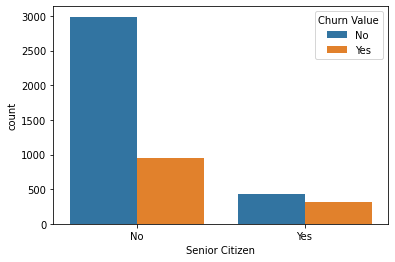

In [39]:
sns.countplot(data=telecom_customer,x='Senior Citizen', hue='Churn Value')


* Less customers are senior citizen and 1/3 of them are churn.
* Senior citizen are mostly churn.